In [3]:
import numpy as np
import pandas as pd

In [4]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Input, Dense, GRU, Embedding, CuDNNGRU
from keras.layers.recurrent import LSTM
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import KFold
#sklearn eklendi
import tensorflow.keras
from tensorflow.keras import metrics
from matplotlib import pyplot

In [5]:
dataset = pd.read_csv('veriler.csv') #veriler csv içinde bir metin var 

In [6]:
dataset.drop(dataset.loc[dataset['group']==0].index, inplace=True)
 #grup nosu 0 olanlar silindi

In [7]:
dataset

tweet  group
0                         honor support hero fight folio      3
2      deangelohall willcompton redskins hata gun mon...      2
4      recommend factfulness highly han family member...      3
6            chocolate amp headbutts team amp kind night      1
7      check skullcandy spring paniniauthentic score ...      2
...                                                  ...    ...
10447              jamesstanzoni termineradio ignore day      2
10448  great talk student soul national university to...      3
10450  suedhellmann division parent confidence child ...      3
10452  wonder ll win team medium dmitri water war tom...      1
10453   learn maize wheat carlo slim commit great happen      3

[7521 rows x 2 columns]

In [8]:
dataset = dataset.reset_index()#dataset indexleri 0 dan başla

In [9]:
dataset

index                                              tweet  group
0         0                     honor support hero fight folio      3
1         2  deangelohall willcompton redskins hata gun mon...      2
2         4  recommend factfulness highly han family member...      3
3         6        chocolate amp headbutts team amp kind night      1
4         7  check skullcandy spring paniniauthentic score ...      2
...     ...                                                ...    ...
7516  10447              jamesstanzoni termineradio ignore day      2
7517  10448  great talk student soul national university to...      3
7518  10450  suedhellmann division parent confidence child ...      3
7519  10452  wonder ll win team medium dmitri water war tom...      1
7520  10453   learn maize wheat carlo slim commit great happen      3

[7521 rows x 3 columns]

In [10]:
dataset.drop(["index"], axis=1) #index kolonu silindi

tweet  group
0                        honor support hero fight folio      3
1     deangelohall willcompton redskins hata gun mon...      2
2     recommend factfulness highly han family member...      3
3           chocolate amp headbutts team amp kind night      1
4     check skullcandy spring paniniauthentic score ...      2
...                                                 ...    ...
7516              jamesstanzoni termineradio ignore day      2
7517  great talk student soul national university to...      3
7518  suedhellmann division parent confidence child ...      3
7519  wonder ll win team medium dmitri water war tom...      1
7520   learn maize wheat carlo slim commit great happen      3

[7521 rows x 2 columns]

In [11]:
target = dataset['group'].values
data = dataset['tweet'].values

In [64]:
target

array([3, 2, 3, ..., 3, 1, 3], dtype=int64)

In [12]:
len(dataset)

7521

In [13]:
inputs = dataset

In [14]:
#tenserflow veya keras, vektörlere, sayısal ifadelere kendisi çeviryor.
kes = int(len(inputs)*0.8) #eğitilecek değerler

In [15]:
kes


6016

In [66]:
inputs

index                                              tweet  group
0         0                     honor support hero fight folio      3
1         2  deangelohall willcompton redskins hata gun mon...      2
2         4  recommend factfulness highly han family member...      3
3         6        chocolate amp headbutts team amp kind night      1
4         7  check skullcandy spring paniniauthentic score ...      2
...     ...                                                ...    ...
7516  10447              jamesstanzoni termineradio ignore day      2
7517  10448  great talk student soul national university to...      3
7518  10450  suedhellmann division parent confidence child ...      3
7519  10452  wonder ll win team medium dmitri water war tom...      1
7520  10453   learn maize wheat carlo slim commit great happen      3

[7521 rows x 3 columns]

In [67]:
 from sklearn.feature_extraction.text import CountVectorizer


In [71]:
vectorizer = CountVectorizer()


In [91]:
tweet = inputs["tweet"].Text

AttributeError: 'Series' object has no attribute 'Text'

In [86]:
tweet

array(['honor support hero fight folio',
       'deangelohall willcompton redskins hata gun mon don insult man brow big fan',
       'recommend factfulness highly han family member write life wonderful summary stood review',
       ..., 'suedhellmann division parent confidence child tedtalks',
       'wonder ll win team medium dmitri water war tom cruise jimmy fall',
       'learn maize wheat carlo slim commit great happen'], dtype=object)

In [87]:
X = vectorizer.fit_transform(tweet)

In [89]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [90]:
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))

In [69]:
tweet

0                          honor support hero fight folio
1       deangelohall willcompton redskins hata gun mon...
2       recommend factfulness highly han family member...
3             chocolate amp headbutts team amp kind night
4       check skullcandy spring paniniauthentic score ...
                              ...                        
7516                jamesstanzoni termineradio ignore day
7517    great talk student soul national university to...
7518    suedhellmann division parent confidence child ...
7519    wonder ll win team medium dmitri water war tom...
7520     learn maize wheat carlo slim commit great happen
Name: tweet, Length: 7521, dtype: object

In [98]:
text = """Yesterday Yesterday Yesterday Yesterday I went fishing. I don't fish that often, 
so I didn't catch any fish. I was told I'd enjoy myself, 
but it didn't really seem that fun."""

vectorizer = CountVectorizer()

matrix = vectorizer.fit_transform([text])
matrix

<1x20 sparse matrix of type '<class 'numpy.int64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [105]:
matrix.toarray()

array([[1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 4]],
      dtype=int64)

In [100]:
import matplotlib.pyplot as plt


In [106]:
pyplot.plot(matrix.toarray()[0])

In [ ]:
#haftaya ödev:
#bu yapılan çalışmadan wordcloud oluşturuyoruz. 
#kelime bulutu oluştur
#hangi kelimenin çok kullanıldığı #count vectorizer
#inputs len(inputs) kısmında wordcloud yapacağız. dataframe içinde wordcloud yapılabilir mi ?
#hangi kelime çok kulanıldıysa, en çok kullanılan 10 kelimeyi bul ve stün grafiği yap.
#---
#mdev2: elman network diye bir konu var. ikinci konu: bert öğren ve anlat.(kelime gömme metoduna benziyormuş)
#lstm çok bilinen bir şey değil. bir derin öğrenme algoritmasıdır. gru, cnn bir derin öğrenme algoritmasıdır.
#lstm cnn daha karmaşıktır ama son teknolojidir. baes 80lerde çıkmış.
#dropout layeri ne işe yarar? neden kullanırz

#veri madencikiğinde cross validaton kulan engin.
isterçağrazlama yap, etkili bir karşılama yaparsın. verinin 1 2 3 4. test verisi olarak sıra sıra test verisini alıyor. kalanları eğitim verisi olarak kullanıyor.
başarıyı arttıracak daha iyi bir sonuç bulabilir miyiz bunu görmüş oluyoruz.
saykıt learn ktğo 5 ayrı test verisi oluşturur. farklı değerler bulabilir.

#çaprazlamada tamamında herkes bir test verisi olabiliyor.. cross valid. de herkes test verisi olduğubndan başarıyı her yerde denediğinden güzel oluyor.

In [22]:
x_train, x_test = inputs[:kes],inputs[kes:]

In [23]:
x_train

index                                              tweet  group
0         0                     honor support hero fight folio      3
1         2  deangelohall willcompton redskins hata gun mon...      2
2         4  recommend factfulness highly han family member...      3
3         6        chocolate amp headbutts team amp kind night      1
4         7  check skullcandy spring paniniauthentic score ...      2
...     ...                                                ...    ...
6011   8349  thxsharin cool pick paulapattonxo enemy render...      1
6012   8351  time defend summerisserious title skill pick h...      2
6013   8353                            team search sweet doesn      1
6014   8355   super rare bobby team donna far shirt thanks lot      1
6015   8356  education hard issue foundation work visit how...      3

[6016 rows x 3 columns]

In [24]:
target #metin ifadeleri

array([3, 2, 3, ..., 3, 1, 3], dtype=int64)

In [25]:
x_train[100]#100.satırın ne olduğunu söylüyor #cümleyi verdi

KeyError: 100

In [26]:
data

array(['honor support hero fight folio',
       'deangelohall willcompton redskins hata gun mon don insult man brow big fan',
       'recommend factfulness highly han family member write life wonderful summary stood review',
       ..., 'suedhellmann division parent confidence child tedtalks',
       'wonder ll win team medium dmitri water war tom cruise jimmy fall',
       'learn maize wheat carlo slim commit great happen'], dtype=object)

In [27]:
target=np.array(target)


In [3]:
num_words = 4000 ##4000 satırlık kelime var ama içinde aşırı bir kelime yok. #4000 tane çok kullanılan kelimeyi bu işlem için kullanacağız #4000 maximum değere kadar çıkar
tokenizer = Tokenizer(num_words=num_words)#tenserflowun tokenizer adındaki fonksyonunu çağıdık.  #numwords = kelime sayısıdır

NameError: name 'Tokenizer' is not defined

In [29]:
tokenizer.fit_on_texts(data) #kelimeleri kullanım sıklığına göre sıralar

In [2]:
type(tokenizer)

NameError: name 'tokenizer' is not defined

In [30]:
tokenizer.word_index #en çok kullanılan kelimelerden en az kullanılan kelimelere doğru bir kullanılma sıklığı sayı ataması yaptı. #dictionary tipinde döndürdü. en çok kullanılan
#kelimeleri key value olarak etiketler. president: 1 # en çok kullanılan kelime

{'team': 1,
 'tom': 2,
 'amp': 3,
 'great': 4,
 'love': 5,
 'work': 6,
 'year': 7,
 'people': 8,
 'good': 9,
 'll': 10,
 'day': 11,
 'life': 12,
 'time': 13,
 'book': 14,
 'watch': 15,
 'cruise': 16,
 'today': 17,
 'waldorfsfinest': 18,
 'fan': 19,
 'talk': 20,
 'learn': 21,
 'fight': 22,
 'change': 23,
 'man': 24,
 'progress': 25,
 'live': 26,
 'read': 27,
 'energy': 28,
 'make': 29,
 'don': 30,
 'big': 31,
 'lot': 32,
 'health': 33,
 'video': 34,
 'pick': 35,
 'gun': 36,
 'climate': 37,
 'game': 38,
 'start': 39,
 'country': 40,
 'folio': 41,
 'movie': 42,
 'excite': 43,
 'global': 44,
 'share': 45,
 'get': 46,
 'see': 47,
 'teacher': 48,
 'story': 49,
 'save': 50,
 'help': 51,
 'favorite': 52,
 'come': 53,
 'sweet': 54,
 'innovation': 55,
 'support': 56,
 'awesome': 57,
 'student': 58,
 're': 59,
 'check': 60,
 'future': 61,
 'disease': 62,
 'world': 63,
 'question': 64,
 'play': 65,
 'tomorrow': 66,
 'win': 67,
 'child': 68,
 'reach': 69,
 'week': 70,
 'list': 71,
 'africa': 72,
 '

In [4]:
data_tokens = tokenizer.texts_to_sequences(data) #her bir satırdaki kelimleri sayısal değerlerini verir her bir sayı veya sayı lar bir arraya atanır örneğin president [1] olarak ifade edilir. Her satırdaki kelimeleri, sözlükte belirlediği kelimeleri sayıya dönüştürür 

NameError: name 'tokenizer' is not defined

In [32]:
#bu değerleri adam kütüphanesiyle optimize edecek ve sınıflandırmayı daha doğru yapmakla uğraşacak

In [33]:
#lstm, input alarak... bir cümle yazamadım

In [34]:
data_tokens

[[250, 56, 218, 22, 41],
 [3919, 3920, 2817, 239, 36, 424, 30, 1888, 24, 106, 31, 19],
 [354, 2243, 1070, 982, 143, 679, 201, 12, 593, 3921, 3922, 301],
 [2818, 3, 1889, 1, 3, 233, 103],
 [60, 1890, 902, 1891, 302, 31, 11],
 [736, 3923, 3924, 294, 3925, 1435],
 [164, 1290, 319, 4, 14],
 [1291, 1165, 2819, 271, 1892, 320, 44, 1436, 301],
 [19, 478, 497, 38],
 [635, 383, 98, 367, 114, 1893, 11, 3, 1649, 101],
 [85, 26, 355, 83, 384, 49, 72, 39, 385, 406],
 [93, 849, 260, 109, 76, 983],
 [850, 10, 47, 12, 1071, 3926],
 [903, 1650, 1166],
 [96,
  498,
  2244,
  20,
  356,
  4,
  1072,
  154,
  65,
  272,
  594,
  1894,
  499,
  87,
  1167,
  109,
  539,
  226],
 [5, 1895, 47, 115, 285, 523, 3, 115],
 [2245, 2246, 1292, 39, 21, 209, 39, 6, 131, 155, 3927, 737, 329, 160, 3928],
 [118, 139, 2247, 35, 1651, 559, 436, 680, 3, 2, 851, 984, 498],
 [1652],
 [96, 1653, 13, 2248, 524, 20, 127, 1073, 784, 88, 321, 37, 386],
 [99, 25, 240, 210, 154, 1293],
 [437, 500, 985, 785, 2820, 22, 41, 1654],
 [

In [35]:
#ltsm ye verilecek değerlerin hazırlanması
num_tokens = [len(tokens) for tokens in data_tokens] #dizi içine bir döngü açtık. #token(sayısal ifade biçimi birimi olarak ifade ediyorlar). 
num_tokens[0]#verilen satırın kaç kelimeden oluştuğunu verir
num_tokens = np.array(num_tokens)
np.mean(num_tokens) #ortalama token sayısı #8.835 

6.6586890041217925

In [36]:
num_tokens[0]

5

In [37]:
np.mean(num_tokens)

6.6586890041217925

In [38]:
np.max(num_tokens)

23

In [39]:
np.argmax(num_tokens)#en uzun cümle 

4665

In [40]:
inputs[838]#o cümleyi göster

KeyError: 838

In [41]:
max_tokens = np.mean(num_tokens) + 2*np.std(num_tokens) #standart sapmanın iki katını ortalamaya ekliyoruz. #olasılık yoğunluk fonksyonu //kaç sütunluk veri olacağını buradan belirleriz
max_tokens = int(max_tokens)

max_tokens

13

In [42]:
np.std(num_tokens)

3.578675906485782

In [43]:
max_tokens = 18 t

SyntaxError: invalid syntax (<ipython-input-43-a2117fed7de7>, line 1)

In [44]:
np.sum(num_tokens < max_tokens) / len(num_tokens) #max_tokens = 18 #bu hesaplama, 0.92 çıkıyor. %92`si 18 in altındadır. #30 yazsaydık 1 çıkardı %100. 

0.9355138944289323

In [45]:
#padding işlemi yapacaaz sınav..  
#tensorflowa yaptıracağız.

In [48]:
data_pad = pad_sequences(data_tokens, maxlen=max_tokens)#parantez içinde imput tokensler kullanılır.#kimisi kesilecek, kimisine 0lar ekelenecek..#bazılarına ekliyo bazılarına çıkarıyo. tenserflowun bir fonku
#,input tokens her bir satırın sayı olarak ifadesidir ve her bir satırda farklı kelimeler farklı ölçüde sayılar var. bu farklı sayılar, 18 olarak belirler
#sayıları satırlara yerleştirdik(18)
#şimdi tüm satırdaki sayıları 18 sütuna ayarlarız. bir satırda 18 kelimeden daha az kelime varsa, onlara 0 ekler.. her bir satır artık 18 tane sayı değeri içeriyor.
int(len(data_pad)*0.8) #saykıt learn ile daha avantajlıdır.

6016

In [49]:
np.array(data_tokens[1])

array([3919, 3920, 2817,  239,   36,  424,   30, 1888,   24,  106,   31,
         19])

In [50]:
data_pad=np.array(data_pad)

In [51]:
idx = tokenizer.word_index
inverse_map = dict(zip(idx.values(), idx.keys()))

In [52]:
def tokens_to_string(tokens):
    words = [inverse_map[token] for token in tokens if token!=0]
    text = ' '.join(words)
    return text

In [53]:
tokens_to_string(data_tokens[1])

'deangelohall willcompton redskins hata gun mon don insult man brow big fan'

In [54]:
num2_words=len(tokenizer.word_index)

In [55]:
num2_words
#

7724

In [56]:
embedding_size=32 #her bir şeyi 32 olarak belirttij.her bir kelime 32 adet rasgele vektörden oluşacaktır. team kelimesinin karşılığı 2 dir yukarıda valuesi. 2 yi kaldırıp 32 tane vektör koyar onun yerine. embedding layer rasele vektörlere dönüştürdü, eğitim başlatılması gerekiyr. eğitim başladığnda vektörler sürekli kendini güncelleyecek. 50 iterasyon yapıldıysa örneğin, sürekli güncellediği için vektörler kenini, daha iyi sonuçlar elde ederiz. Glov vektörlerini koyabiliriz. enimal kelimesinin karşılığında örneğin iyi vektörleri oluştumuştur.
#rasgeleliği 100 yapacan. kelimelerin varsa glov vektörler ilgili vektörlerle değiştirecek, daha doğru sonuçlar verecek. glov vektörünün içinde yoksa vekö

In [57]:
word2vec = {}
with open('glove.6B.100d.txt', encoding='UTF-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vec = np.asarray(values[1:], dtype='float32')
        word2vec[word] = vec

FileNotFoundError: [Errno 2] No such file or directory: 'glove.6B.100d.txt'

In [58]:
embedding_matrix = np.random.uniform(-1, 1, (num2_words+1, embedding_size))
for word, i in tokenizer.word_index.items():
    if i < num2_words:
        embedding_vector = word2vec.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [59]:
embedding_matrix.shape

(7725, 32)

In [60]:
input_var = Input(shape=(None,), name='input_var')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding-layer (Embedding)  (None, None, 32)          247200    
_________________________________________________________________
module_wrapper (ModuleWrappe (None, None, 16)          3136      
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, None, 8)           800       
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 4)                 208       
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 4)                 0         
_________________________________________________________________
dense (Dense)                (None, 4)                 20        
Total params: 251,364
Trainable params: 251,364
Non-trainable params: 0
__________________________________________________

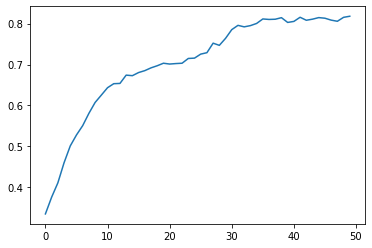

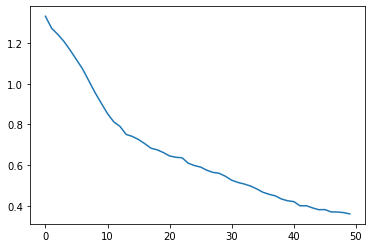

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding-layer (Embedding)  (None, None, 32)          247200    
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, None, 16)          3136      
_________________________________________________________________
module_wrapper_5 (ModuleWrap (None, None, 8)           800       
_________________________________________________________________
module_wrapper_6 (ModuleWrap (None, 4)                 208       
_________________________________________________________________
module_wrapper_7 (ModuleWrap (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
Total params: 251,364
Trainable params: 251,364
Non-trainable params: 0
________________________________________________

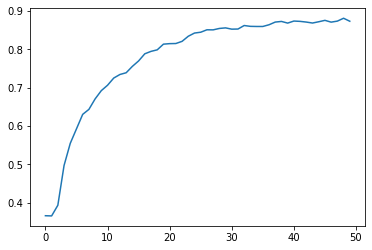

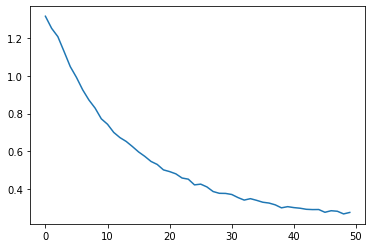

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding-layer (Embedding)  (None, None, 32)          247200    
_________________________________________________________________
module_wrapper_8 (ModuleWrap (None, None, 16)          3136      
_________________________________________________________________
module_wrapper_9 (ModuleWrap (None, None, 8)           800       
_________________________________________________________________
module_wrapper_10 (ModuleWra (None, 4)                 208       
_________________________________________________________________
module_wrapper_11 (ModuleWra (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
Total params: 251,364
Trainable params: 251,364
Non-trainable params: 0
________________________________________________

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding-layer (Embedding)  (None, None, 32)          247200    
_________________________________________________________________
module_wrapper_12 (ModuleWra (None, None, 16)          3136      
_________________________________________________________________
module_wrapper_13 (ModuleWra (None, None, 8)           800       
_________________________________________________________________
module_wrapper_14 (ModuleWra (None, 4)                 208       
_________________________________________________________________
module_wrapper_15 (ModuleWra (None, 4)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 20        
Total params: 251,364
Trainable params: 251,364
Non-trainable params: 0
________________________________________________

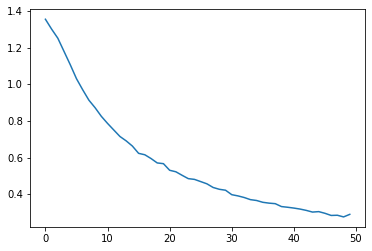

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding-layer (Embedding)  (None, None, 32)          247200    
_________________________________________________________________
module_wrapper_16 (ModuleWra (None, None, 16)          3136      
_________________________________________________________________
module_wrapper_17 (ModuleWra (None, None, 8)           800       
_________________________________________________________________
module_wrapper_18 (ModuleWra (None, 4)                 208       
_________________________________________________________________
module_wrapper_19 (ModuleWra (None, 4)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
Total params: 251,364
Trainable params: 251,364
Non-trainable params: 0
________________________________________________

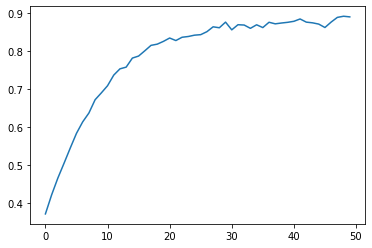

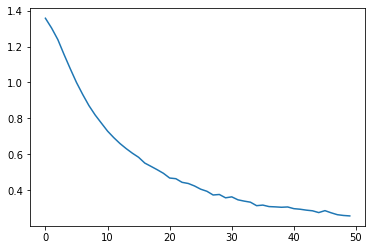

In [61]:
kfold=KFold(n_splits=5, shuffle=True, random_state=5) #endsplit kaç parçaya ayırılacağıdır. shuffle=True(eğer shuffle true ise.. random state değeri vermemiz gerekir.) true değilse randostate =none denilebilir.
for train,test in kfold.split(data_pad,target):#tamamını yazıyoruz. test train artık yok. inputs_pad =data_pad yani son düzenlenmiş, sayılara çevrilmiş halini, padding yapılmış sütunları ayarlanmış halini verdik.
    x_train,x_test,y_train,y_test=data_pad[train],data_pad[test],target[train],target[test]
    model = Sequential() #
    embedding_size = 32 #32 vektörden oluşsun [1257] yazmak yerine, bu sayıyı ifade edecek 32lik bir vektör oluşturacak ve bunu her kelime ? cümle? için yapacak
    model.add(Embedding(input_dim=num2_words+1,##input sayısı yani 4000 = num2_words yerine yazılabilir. dersteki örnekte
                              output_dim=embedding_size,
                              weights=[embedding_matrix],
                              trainable=True,
                              name='embedding-layer'))
    model.add(LSTM(units=16, return_sequences=True))#önümüzdeki derste gösterem. embeding layerdeki her kelimeyi gçösterecek? sonra lstmye aktaracak, verecek.  #lstm veya gru modelleri kullanılabilir
#model fit yapmadık henüz. veriye uygulamadık. embeddingdeki sonuçar nedir çıkarmamız şu aşamada doğru değil
#16 8 4 1 o satırın sonucnu bize söylemesini istiyoruz. test verisini tek bir sonuca dönüştürmek amaç. 
    model.add(LSTM(units=8, return_sequences=True))#bir lstm katmanı ekliyoruz. units=16 yazıldı.
    model.add(LSTM(units=4, return_sequences=False))#8lik gelen veriyi 4`e düşür.
    model.add(Dropout(0.43)) #öğrenme zorluğu getiriyor

    #sigmoid 0,1 arasında değerler oluşturur. tanjant -1,1 softmax kullanacaksınız siz.
    #lstm yerine dense de kullanılabilir. dense lstm gibi bir şey. daha basittir lstm den.
    #4 gruplu bir örnek: binary cros entropy yerine spars categorical entropy kullanılabilir.
    #0 1 = sigmoid, grup=softmax, tan -1 +1
    #aktivasyon fonksyonları nelerdir.
    model.add(Dense(4, activation='softmax'))#dense adında bir layer oluştur. 1 tane sonuç çıkar, activation="sigmoid" = 0a yakınsa 0, 1e yakınsa 1 
    #binary doğru değil sparse kulanılmalı diy.
    model.compile(loss='sparse_categorical_crossentropy', #fazla grup olsaydı categorcal crossentropy yazıyoruz. derste binary_crossentropy yazdık çünkü az grubumuz var?
              optimizer='adam',
              metrics=['accuracy'])
    model.summary()
    train=model.fit(x_train, y_train, epochs=50, batch_size=256)
    result = model.evaluate(x_test, y_test)
    pyplot.plot(train.history['accuracy'])
    pyplot.show()
    pyplot.plot(train.history['loss'])
    pyplot.show()
    

In [62]:
train = model.fit(x_train_pad, y_train, epochs = 20, batch_size=256)#veriyi 256 lık gruplar halinde al
#sonuç 1/20 20/20 aşamalarından geçti. accurisy 0.99 %99 çıktı. veileri %99 oranında tahmin edibiliyoruz

NameError: name 'x_train_pad' is not defined

In [ ]:
result = model.evaluate(x_test_pad, y_test) #test verisiyle karşılaştırıyoruz ve %95 lik başarı bulduk

In [ ]:
from matplotlib import pyplot

In [ ]:
pyplot.plot(train.history(['accuracy']))#accurasy bir metrik değeri #mse: mean squad error
#bir grafik çizdi, 0.60tan başladı %95bulduk
#bu grafik bormalde gösterilmez ama jupyter ide gösteriyor. normalde .show() demen lazım polyplot.show()

In [ ]:
#haftaya ödev:
#bu yapılan çalışmadan wordcloud oluşturuyoruz. 
#kelime bulutu oluştur
#hangi kelimenin çok kullanıldığı #count vectorizer
#inputs len(inputs) kısmında wordcloud yapacağız. dataframe içinde wordcloud yapılabilir mi ?
#hangi kelime çok kulanıldıysa, en çok kullanılan 10 kelimeyi bul ve stün grafiği yap.
#---
#mdev2: elman network diye bir konu var. ikinci konu: bert öğren ve anlat.(kelime gömme metoduna benziyormuş)
#lstm çok bilinen bir şey değil. bir derin öğrenme algoritmasıdır. gru, cnn bir derin öğrenme algoritmasıdır.
#lstm cnn daha karmaşıktır ama son teknolojidir. baes 80lerde çıkmış.
#dropout layeri ne işe yarar? neden kullanırz

#veri madencikiğinde cross validaton kulan engin.
isterçağrazlama yap, etkili bir karşılama yaparsın. verinin 1 2 3 4. test verisi olarak sıra sıra test verisini alıyor. kalanları eğitim verisi olarak kullanıyor.
başarıyı arttıracak daha iyi bir sonuç bulabilir miyiz bunu görmüş oluyoruz.
saykıt learn ktğo 5 ayrı test verisi oluşturur. farklı değerler bulabilir.

#çaprazlamada tamamında herkes bir test verisi olabiliyor.. cross valid. de herkes test verisi olduğubndan başarıyı her yerde denediğinden güzel oluyor.